# 1. tensorflow v2.xx에서 v1사용하기

In [40]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior() # v2 비활성화하고 v1을 활성화
import numpy as np
import pandas as pd

## Tensorflow
- 그래프 정의 (tensor 객체의 흐름)
- sess = tf.Session()을 실행
- sess.run()을 통해 변수값을 확인할 수 있음

In [2]:
# tensor = data(상수, 변수)와 연산
node1 = tf.constant('Hello, Tensorflow')
sess = tf.Session()
print(sess.run(node1))
print(sess.run(node1).decode())

b'Hello, Tensorflow'
Hello, Tensorflow


In [3]:
# 간단한 수학 연산 tensor 그래프
node1 = tf.constant(10, 
                    dtype = tf.float16)
node2 = tf.constant(20,
                    dtype = tf.float16)
node3 = tf.add(node1, node2)

sess = tf.Session() # 활성화
print(sess.run([node1, node2, node3]))

[10.0, 20.0, 30.0]


In [4]:
# 타입 변경
import numpy as np
node1 = tf.constant(np.array([1, 2, 3]),
                    dtype = tf.int16)
node2 = tf.cast(node1, dtype = tf.float32) # 형변환
sess = tf.Session()
print(sess.run([node1, node2]))

[array([1, 2, 3], dtype=int16), array([1., 2., 3.], dtype=float32)]


In [5]:
# 평균값 계산: tf.reduce_mean()
data = np.array([1., 2., 3., 4.])
m = tf.reduce_mean(data) # 실수
sess = tf.Session()
sess.run(m)

2.5

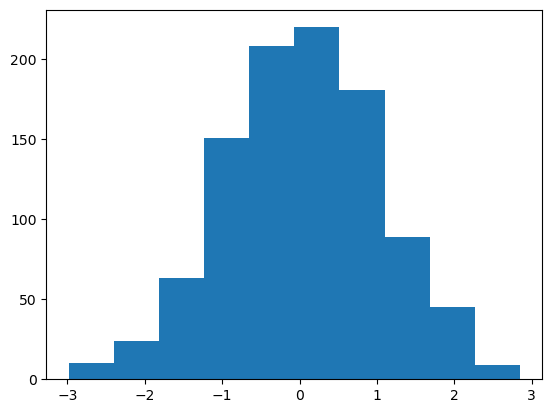

In [6]:
# tf.random_normal([size]): 평균 0, 표준편차 1인 난수 size개 발생. 
# 난수개수: 독립변수개수
import matplotlib.pyplot as plt
tensor = tf.random_normal([1000]) # 평균 0, 표준편차 1인 난수 2개 (정규분포)
sess = tf.Session()
plt.hist(sess.run(tensor))
plt.show()

# 2. tensorflow v1을 이용한 linear regression을 구현
## 2.1 독립변수 x가 1개, 종속변수 y가 1개

In [7]:
# tensor 그래프(객체 흐름) 정의
# data set(x, y)
x = np.array([1, 2, 3])
y = np.array([1, 2, 3]) # y = 1*x + 0

# weight와 bias (처음에는 랜덤값으로 셋팅했다가, 학습과정에서 변경)
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random_normal([1]),
                name = 'bias')

# Hypothesis: 결과는 Numpy array
H = W*x + b

# cost function (손실함수 = mse: 최소제곱법)
cost = tf.reduce_mean(tf.square(H-y))

'''
학습 목적: cost가 최소가 되는 W, b를 찾는 것
cost 함수는 2차함수이므로 곡선 그래프. 곡선 위 미분값이 줄어드는 방향으로 학습(경사하강법)
'''
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

# Session 생성
sess = tf.Session()
# tf.Variable 변수 노드(W, b) 초기화
sess.run(tf.global_variables_initializer())
sess.run([W, b])

# 6000번 학습 (v2에서의 fit함수)
for step in range(1, 6000):
    _, cost_val, W_val, b_val, = sess.run([train, cost, W, b])
    if step % 300 == 0:
        print("{}번째 cost:{}, W:{}, b:{}".format(step, 
                                                 cost_val, 
                                                 W_val,
                                                 b_val))

300번째 cost:1.5337685566052528e-09, W:[0.9999546], b:[0.00010332]
600번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
900번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1200번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1500번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
1800번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2100번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2400번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
2700번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3000번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3300번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3600번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
3900번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
4200번째 cost:1.5000347020283425e-14, W:[0.9999998], b:[3.377597e-07]
4500번째 cost:1.5000347020283425e-14, W:[0.9999998], b:

In [8]:
# 최종적으로 나온 회귀식 H = W*x + b
sess.run([W, b])

[array([0.9999998], dtype=float32), array([3.377597e-07], dtype=float32)]

In [9]:
W_, b_ = sess.run([W, b])
W_, b_

(array([0.9999998], dtype=float32), array([3.377597e-07], dtype=float32))

In [10]:
print('최종회귀식: H = {}*x + {}'.format(W_[0], b_[0]))

최종회귀식: H = 0.9999998211860657*x + 3.3775970109672926e-07


In [11]:
def to_predict(x):
    return W_[0]*x + b_[0]

In [12]:
to_predict(3)

2.999999801317898

## 2.2 predict을 하기 위한 placeholder 이용
- placeholder: 외부에서 데이터를 입력받을 수 있는 노드

In [13]:
a = tf.placeholder(tf.float16)
b = tf.placeholder(tf.float16)
ab = tf.add(a, b)
sess = tf.Session()
sess.run([a, b, ab], feed_dict = {a:10, 
                                  b:20})

[array(10., dtype=float16), array(20., dtype=float16), 30.0]

In [14]:
sess.run(ab, feed_dict = {a:np.array([1, 2, 3]),
                          b:np.array([1, 2, 3])} )

array([2., 4., 6.], dtype=float16)

In [15]:
# data set (H = 2x + 1)
x_data = np.array([1, 2, 3, 5, 8])
y_data = np.array([3, 5, 7, 11, 17])

# placeholder 설정(x, y)
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random_normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function == loss function 
cost = tf.reduce_mean(tf.square(H - y))
# 경사하강법
train = tf.train.GradientDescentOptimizer(learning_rate = 0.001).minimize(cost)

# session 생성 & 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습 6000번
for step in range(10000):
    _, cost_, W_val, b_val = sess.run([train, cost, W, b], 
                                      feed_dict = {x:x_data,
                                                   y:y_data})
    if step % 300 == 0:
        print("{}/6000번째 cost:{}, W:{}, b:{}".format(step + 1,
                                                      cost_,
                                                      W_val, 
                                                      b_val))

1/6000번째 cost:89.40564727783203, W:[-0.10033521], b:[1.092588]
301/6000번째 cost:0.046537935733795166, W:[1.9262059], b:[1.3944054]
601/6000번째 cost:0.0328940823674202, W:[1.9379628], b:[1.3315883]
901/6000번째 cost:0.023250605911016464, W:[1.9478433], b:[1.278777]
1201/6000번째 cost:0.016434216871857643, W:[1.9561502], b:[1.2343765]
1501/6000번째 cost:0.011616216972470284, W:[1.9631338], b:[1.1970483]
1801/6000번째 cost:0.008210698142647743, W:[1.9690055], b:[1.1656646]
2101/6000번째 cost:0.0058036018162965775, W:[1.9739419], b:[1.1392798]
2401/6000번째 cost:0.004102170001715422, W:[1.978092], b:[1.1170975]
2701/6000번째 cost:0.0028995482716709375, W:[1.9815811], b:[1.0984479]
3001/6000번째 cost:0.0020495334174484015, W:[1.9845144], b:[1.0827688]
3301/6000번째 cost:0.0014486790169030428, W:[1.9869806], b:[1.0695866]
3601/6000번째 cost:0.0010239867260679603, W:[1.989054], b:[1.0585041]
3901/6000번째 cost:0.0007237899117171764, W:[1.9907974], b:[1.0491868]
4201/6000번째 cost:0.0005116046522744, W:[1.9922632], b:[

In [16]:
# 최종 W, b
sess.run([W, b])

[array([1.999728], dtype=float32), array([1.0014515], dtype=float32)]

In [17]:
# 예측하기
sess.run(H, feed_dict = {x:5})

array([11.000092], dtype=float32)

In [18]:
sess.run(H, feed_dict = {x:np.array([5, 6, 7])})

array([11.000092, 12.999819, 14.999547], dtype=float32)

## 2.3 scale이 다른 데이터들의 linear regression 구현(scale 조정 X)

In [19]:
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])

# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 6001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:x_data,
                                                                           y:y_data})
    if step % 300 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:4731.59765625, W:[-0.5749534], b:[-1.8321841]
301/6000번째 cost:79.13964080810547, W:[10.163204], b:[-0.25602698]
601/6000번째 cost:79.13947296142578, W:[10.160421], b:[-0.23541528]
901/6000번째 cost:79.13945770263672, W:[10.159957], b:[-0.23197973]
1201/6000번째 cost:79.13944244384766, W:[10.15988], b:[-0.23140821]
1501/6000번째 cost:79.13944244384766, W:[10.159867], b:[-0.23131348]
1801/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
2101/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
2401/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
2701/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
3001/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
3301/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
3601/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
3901/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
4201/6000번째 cost:79.13944244384766, W:[10.159865], b:[-0.23130178]
4501/6

In [20]:
# 예측
sess.run(H, feed_dict = {x:5})

array([50.568027], dtype=float32)

In [21]:
# cost값이 멈춤: local 최솟값

## 2.4 scale이 다른 데이터들의 linear regression 구현(scale 조정 O)
### scale 맞추기: 모든 데이터를 일정 범위 내로 조정
- normalization(정규화): 데이터의 최댓값을 1, 최솟값을 0으로 변환
```
                         x - Xmin
    normalization =  ───────────────
                       Xmax - Xmin
```
    * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.MinMaxScaler이용)
- standardization(표준화): 데이터의 평균을 0, 표준편차를 1로 조정
```
                         x - Xmean(평균)
    standardization = ────────────────────
                          Xstd(표준편차)
```
   * 위의 식을 써도 되지만 라이브러리를 주로 씀(sklearn.preprocessing.StandardScaler이용)

In [22]:
# 라이브러리를 쓰지 않고 정규화: 예측할 경우 x데이터를 스케일 변환하고, 스케일된 예측값을 변환이 번거로워
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])

scaled_x_data = (x_data - x_data.min()) / (x_data.max() - x_data.min())
scaled_y_data = (y_data - y_data.min()) / (y_data.max() - y_data.min())
print(scaled_x_data), 
print(scaled_y_data)

[0.         0.11111111 0.44444444 0.77777778 1.        ]
[0.         0.11111111 0.7        0.83333333 1.        ]


In [23]:
x = (5 - x_data.min()) / (x_data.max() - x_data.min())
x

0.4444444444444444

In [24]:
0.7 * (y_data.max() - y_data.min())+y_data.min()

68.0

In [25]:
# 라이브러리를 쓰지 않고 정규화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler() # x_data를 표준화시킬 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)

scaler_y = MinMaxScaler() # y_data를 표준화시킬 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

np.column_stack([x_data, scaled_x_data, y_data, scaled_y_data])

array([[ 1.        ,  0.        ,  5.        ,  0.        ],
       [ 2.        ,  0.11111111, 15.        ,  0.11111111],
       [ 5.        ,  0.44444444, 68.        ,  0.7       ],
       [ 8.        ,  0.77777778, 80.        ,  0.83333333],
       [10.        ,  1.        , 95.        ,  1.        ]])

In [26]:
# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:scaled_x_data,
                                                                           y:scaled_y_data})
    if step % 300 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:0.09338370710611343, W:[1.7619184], b:[-0.34653974]
301/6000번째 cost:0.08244216442108154, W:[1.7129502], b:[-0.31682256]
601/6000번째 cost:0.07295407354831696, W:[1.6665561], b:[-0.29049608]
901/6000번째 cost:0.06470969319343567, W:[1.6229488], b:[-0.26660132]
1201/6000번째 cost:0.05754215270280838, W:[1.5821217], b:[-0.24462922]
1501/6000번째 cost:0.05130995437502861, W:[1.5439733], b:[-0.22428703]
1801/6000번째 cost:0.04589081555604935, W:[1.5083634], b:[-0.20538715]
2101/6000번째 cost:0.04117865860462189, W:[1.4751402], b:[-0.18779595]
2401/6000번째 cost:0.037081278860569, W:[1.4441519], b:[-0.17140779]
2701/6000번째 cost:0.03351838141679764, W:[1.4152511], b:[-0.1561333]
3001/6000번째 cost:0.03042028285562992, W:[1.3882996], b:[-0.1418933]
3301/6000번째 cost:0.027726387605071068, W:[1.3631669], b:[-0.12861638]
3601/6000번째 cost:0.025383900851011276, W:[1.3397303], b:[-0.11623648]
3901/6000번째 cost:0.023347031325101852, W:[1.3178759], b:[-0.10469263]
4201/6000번째 cost:0.02157585322856903, W:[

In [27]:
# 예측
scaled_input = scaler_x.transform(np.array([[2]]))
print("2를 스케일 조정된 값:", scaled_input)
scaled_output = sess.run(H, feed_dict = {x:scaled_input})
print('예측값:', scaler_y.inverse_transform(scaled_output))

2를 스케일 조정된 값: [[0.11111111]]
예측값: [[17.35251]]


In [28]:
# x_data들의 예측값
scaled_y_hat = sess.run(H, feed_dict = {x:scaled_x_data})
y_hat = scaler_y.inverse_transform(scaled_y_hat)
y_hat
np.column_stack([y_data, y_hat])

array([[  5.        ,   6.46378374],
       [ 15.        ,  17.35251045],
       [ 68.        ,  50.01869202],
       [ 80.        ,  82.68486786],
       [ 95.        , 104.46231842]])

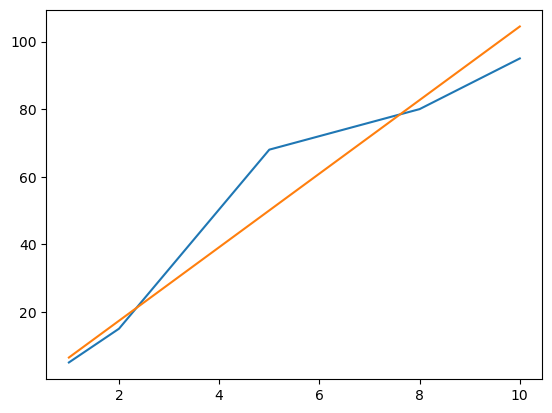

In [29]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data)
plt.plot(x_data, y_hat)
plt.show()

In [30]:
x_data, x_data.ravel(), x_data[:, 0], x_data.flatten()

(array([[ 1],
        [ 2],
        [ 5],
        [ 8],
        [10]]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]),
 array([ 1,  2,  5,  8, 10]))

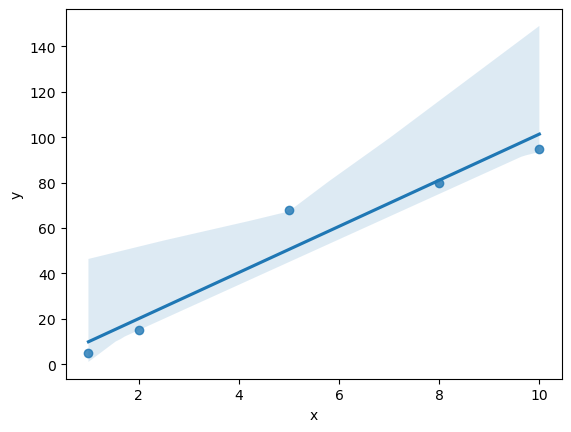

In [31]:
import seaborn as sns
import pandas as pd
df = pd.DataFrame({'x':x_data[:, 0],
                   'y':y_data.ravel()})
sns.regplot(data = df,
            x = 'x', 
            y = 'y')
plt.show()

In [32]:
# 라이브러리를 쓰지 않고 표준화
x_data = np.array([1, 2, 5, 8, 10])
y_data = np.array([5, 15, 68, 80, 95])
scaled_x_data = (x_data - x_data.mean()) / x_data.std()
scaled_y_data = (y_data - y_data.mean()) / y_data.std()
print(scaled_x_data, scaled_y_data)

[-1.22474487 -0.93313895 -0.05832118  0.81649658  1.39970842] [-1.32373476 -1.04563922  0.42826713  0.76198177  1.17912508]


In [33]:
# 라이브러리를 써서 표준화
x_data = np.array([1, 2, 5, 8, 10]).reshape(-1, 1)
y_data = np.array([5, 15, 68, 80, 95]).reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler() # x_data를 표준화할 객체
scaler_x.fit(x_data)
scaled_x_data = scaler_x.transform(x_data)
scaler_y = StandardScaler() # y_data를 표준화할 객체
scaler_y.fit(y_data)
scaled_y_data = scaler_y.transform(y_data)

print(np.column_stack([x_data, scaled_x_data]))
print(np.column_stack([y_data, scaled_y_data]))

[[ 1.         -1.22474487]
 [ 2.         -0.93313895]
 [ 5.         -0.05832118]
 [ 8.          0.81649658]
 [10.          1.39970842]]
[[ 5.         -1.32373476]
 [15.         -1.04563922]
 [68.          0.42826713]
 [80.          0.76198177]
 [95.          1.17912508]]


In [34]:
# placeholder 설정
x = tf.placeholder(dtype = tf.float32)
y = tf.placeholder(dtype = tf.float32)

# weight & bias
W = tf.Variable(tf.random.normal([1]),
                name = 'weight')
b = tf.Variable(tf.random.normal([1]),
                name = 'bias')

# Hypothesis
H = W*x + b

# cost function(loss fucntion; 손실함수)
cost = tf.reduce_mean(tf.square(H - y))

# 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)
train = optimizer.minimize(cost)

# Session & Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 학습
for step in range(1, 10001):
    _, cost_val, W_val, b_val = sess.run([train, cost, W, b], feed_dict = {x:scaled_x_data,
                                                                           y:scaled_y_data})
    if step % 1000 == 1:
        print('{}/6000번째 cost:{}, W:{}, b:{}'.format(step,
                                                       cost_val,
                                                       W_val,
                                                       b_val))

1/6000번째 cost:2.3374886512756348, W:[0.95500743], b:[-1.5086719]
1001/6000번째 cost:0.10272903740406036, W:[0.9670364], b:[-0.20376785]
2001/6000번째 cost:0.061961688101291656, W:[0.9686612], b:[-0.02752181]
3001/6000번째 cost:0.0612180121243, W:[0.9688785], b:[-0.00371722]
4001/6000번째 cost:0.06120442599058151, W:[0.9688999], b:[-0.00050206]
5001/6000번째 cost:0.061204176396131516, W:[0.9688999], b:[-6.78028e-05]
6001/6000번째 cost:0.06120417267084122, W:[0.9688999], b:[-9.15089e-06]
7001/6000번째 cost:0.06120418384671211, W:[0.9688999], b:[-1.228805e-06]
8001/6000번째 cost:0.06120418384671211, W:[0.9688999], b:[-1.601514e-07]
9001/6000번째 cost:0.06120418384671211, W:[0.9688999], b:[-2.8290865e-08]


## 2.5 독립변수 x가 여러개인 linear Regression

In [44]:
# data set
x_data = np.array([[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]])
y_data = np.array([[152], 
                   [185], 
                   [180], 
                   [196], 
                   [142]])
# tensor graph 정의
# placeholder(변수 공간) 설정
# shape = [None, 3]: x_data([5, 3])도 받고, 예측할 때는 [1, 3]. 3열만 고정
X = tf.placeholder(shape = [None, 3],
                   dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)

# weight & bias (weight 3개, bias 1개)
W = tf.Variable(tf.random_normal([3, 1]), # 3행 1열 행렬
                name = 'weight')
b = tf.Variable(tf.random_normal([1]),
                name = 'bias')

# Hypothesis
# H = X@W + b; tf.matmul(X, W) - 행렬곱
H = tf.matmul(X, W) + b
# cost
cost = tf.reduce_mean(tf.square(H - Y))
# train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)
# session 생성과 Variable 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# sess.run([W, b])
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost],
                           feed_dict = {X:x_data,
                                        Y:y_data})
    if step % 5000 == 1:
        print("{}번째 cost:{}".format(step, cost_val))
print("최종 cost:{}".format(cost_val))

1번째 cost:46654.71875
5001번째 cost:4.571014881134033
10001번째 cost:0.6586899757385254
15001번째 cost:0.3586111068725586
20001번째 cost:0.30745598673820496
25001번째 cost:0.279572457075119
30001번째 cost:0.25851041078567505
35001번째 cost:0.24202711880207062
최종 cost:0.22908298671245575


In [47]:
# 예측
sess.run(H, feed_dict = {X: np.array([[73, 80, 77],
                                      [73, 80, 72]])})

array([[152.41202],
       [149.66394]], dtype=float32)

## csv를 array로 읽어오기

In [36]:
# sol 1. csv -> 데이터프레임 -> 넘파이 배열
# 1. csv를 dataFrame 읽어와
data = pd.read_csv('data/ozone.csv')
# 2. 결측치 대체 or 삭제
# data.fillna(value = data.mean(), inplace = True)
data.dropna(how = 'any', axis = 0, inplace = True)
X = data[['Solar.R', 'Wind', 'Temp']].values
y = data['Ozone'].values
X.shape, y.shape

((111, 3), (111,))

In [37]:
# sol 2. csv -> 넘파이 배열
# data = np.loadtxt('data/ozone_nonan.csv', delimiter = ',') # NAN 없어야 함
data = np.genfromtxt('data/ozone.csv', 
                     delimiter = ',',
                     skip_header = 1,
                     missing_values = 'NA',
                     filling_values = np.nan)
data[:5]

array([[ 41. , 190. ,   7.4,  67. ,   5. ,   1. ],
       [ 36. , 118. ,   8. ,  72. ,   5. ,   2. ],
       [ 12. , 149. ,  12.6,  74. ,   5. ,   3. ],
       [ 18. , 313. ,  11.5,  62. ,   5. ,   4. ],
       [  nan,   nan,  14.3,  56. ,   5. ,   5. ],
       [ 28. ,   nan,  14.9,  66. ,   5. ,   6. ],
       [ 23. , 299. ,   8.6,  65. ,   5. ,   7. ],
       [ 19. ,  99. ,  13.8,  59. ,   5. ,   8. ],
       [  8. ,  19. ,  20.1,  61. ,   5. ,   9. ],
       [  nan, 194. ,   8.6,  69. ,   5. ,  10. ],
       [  7. ,   nan,   6.9,  74. ,   5. ,  11. ],
       [ 16. , 256. ,   9.7,  69. ,   5. ,  12. ],
       [ 11. , 290. ,   9.2,  66. ,   5. ,  13. ],
       [ 14. , 274. ,  10.9,  68. ,   5. ,  14. ],
       [ 18. ,  65. ,  13.2,  58. ,   5. ,  15. ],
       [ 14. , 334. ,  11.5,  64. ,   5. ,  16. ],
       [ 34. , 307. ,  12. ,  66. ,   5. ,  17. ],
       [  6. ,  78. ,  18.4,  57. ,   5. ,  18. ],
       [ 30. , 322. ,  11.5,  68. ,   5. ,  19. ],
       [ 11. ,  44. ,   9.7,  6

In [48]:
# csv 파일 -> 데이터프레임 -> 결측치 -> 넘파이 배열 -> 머신러닝
# import statsmodels.api as sm
# sm.datasets.get_rdataset('airquality').data와 동일
data = pd.read_csv('data/ozone.csv')
data.info() # 결측치 처리 필수

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    116 non-null    float64
 1   Solar.R  146 non-null    float64
 2   Wind     153 non-null    float64
 3   Temp     153 non-null    int64  
 4   Month    153 non-null    int64  
 5   Day      153 non-null    int64  
dtypes: float64(3), int64(3)
memory usage: 7.3 KB


In [53]:
data.mean(axis = 0) # 열별 평균

Ozone       42.129310
Solar.R    185.931507
Wind         9.957516
Temp        77.882353
Month        6.993464
Day         15.803922
dtype: float64

In [79]:
# 결측치 처리 
# sol 1: 결측치 행을 제거
# data.dropna(how = 'any', axis = 0) # axis = 0: 기본값 생략가능. 결측치가 한 열이라도 있는 행 삭제

# sol 2: 열별 평균값으로 대체
# data.fillna(value = data.mean())

# sol 3: 열별 월별 평균값으로 대체
mean_data = data.groupby('Month')[['Ozone', 'Solar.R']].mean()
mean_data.loc[5, 'Ozone']

23.615384615384617

In [90]:
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # row = row.copy()
    pd.options.mode.copy_on_write = True
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis = 1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]

In [101]:
# 독립변수 & 종속변수 (values: 판다스 데이터를 넘파이배열로)
x_data = data[['Solar.R', 'Wind', 'Temp']].values
x_data = data.iloc[:, 1:].values
y_data = data['Ozone'].values.reshape(-1, 1)
y_data = data[['Ozone']].values
x_data.shape, y_data.shape

# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape = [None, 3],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)
# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X, W) + b # Matrix를 사용할 경우 관용적으로 대문자 사용, X를 앞에 위치
# 4. cost함수 = loss함수 = 손실함수
cost = tf.reduce_mean(tf.square(H - y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)
# sess 객체 생성 & W, b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 15001):
    _, cost_val = sess.run([train, cost], feed_dict = {X : x_data,
                                                       y : y_data})
    if step % 2000 == 1:
        print("{}번째 cost: {}".format(step, cost_val))
print("최종 cost: {},\nW:\n{}\nb:{}".format(cost_val, sess.run(W), sess.run(b)))

1번째 cost: 4595.4814453125
2001번째 cost: 496.7695007324219
4001번째 cost: 470.7384033203125
6001번째 cost: 464.1844787597656
8001번째 cost: 462.5245056152344
10001번째 cost: 462.0943603515625
12001번째 cost: 461.9730529785156
14001번째 cost: 461.9294738769531
최종 cost: 461.9163513183594,
W:
[[ 0.05532543]
 [-3.5694723 ]
 [ 0.8612244 ]]
b:[-0.47158995]


In [115]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마?)
input_data = np.array([[118, 8, 72]])
sess.run(H, feed_dict = {X: input_data})

array([[10.581866]], dtype=float32)

In [125]:
# MinMaxScaler, StandardScaler을 이용하여 스케일 조정 후 tensorflow 수행
# 주로 0~1사이   주로 0근처
data = pd.read_csv('data/ozone.csv')
# 결측치 처리
mean_data = data.groupby('Month')[['Ozone', 'Solar.R']].mean()
def fill_nan(row):
    "row['Ozone']과 row['Solar.R']값이 결측치면 mean_data.loc[월, 열이름]으로 대체"
    # row = row.copy()
    pd.options.mode.copy_on_write = True
    if row.isna()['Ozone']:
        row['Ozone'] = mean_data.loc[row.Month, 'Ozone']
    if row.isna()['Solar.R']:
        row['Solar.R'] = mean_data.loc[row.Month, 'Solar.R']
    return row
# data.loc[4], fill_nan(data.loc[4])
data = data.apply(fill_nan, axis = 1)
data = data[['Ozone', 'Solar.R', 'Wind', 'Temp']]
# 독립변수 & 종속변수 (values: 판다스 데이터를 넘파이배열로)
x_data = data.iloc[:, 1:].values
y_data = data[['Ozone']].values
# 독립변수와 종속변수의 scale 조정
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
scaled_x_data = scaler_x.fit_transform(x_data)
scaler_y = StandardScaler()
scaled_y_data = scaler_y.fit_transform(y_data)
scaled_x_data.shape, scaled_y_data.shape

((153, 3), (153, 1))

In [126]:
# 확인용
np.column_stack([x_data[:2], y_data[:2]])
np.column_stack([scaled_x_data[:2], scaled_y_data[:2]])

array([[ 0.05092139, -0.72833223, -1.15348973,  0.00504225],
       [-0.77008922, -0.55746359, -0.62350796, -0.1644592 ]])

In [131]:
# tensorflow 구현
# 1. X, y
X = tf.placeholder(shape = [None, 3],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)
# 2. 독립변수 3개, 종속변수 1개인 모델의 weight, bias
W = tf.Variable(tf.random_normal([3, 1]))
b = tf.Variable(tf.random_normal([1]))
# 3. Hypothesis
H = tf.matmul(X, W) + b # Matrix를 사용할 경우 관용적으로 대문자 사용, X를 앞에 위치
# 4. cost함수 = loss함수 = 손실함수
cost = tf.reduce_mean(tf.square(H - y))
# 5. train
train = tf.train.GradientDescentOptimizer(learning_rate = 1e-5).minimize(cost)
# sess 객체 생성 & W, b 변수 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 40001):
    _, cost_val = sess.run([train, cost], feed_dict = {X : scaled_x_data,
                                                       y : scaled_y_data})
    if step % 3000 == 1:
        print("{}번째 cost: {}".format(step, cost_val))
print("최종 cost: {}".format(cost_val))

1번째 cost: 3.285945415496826
3001번째 cost: 2.872702121734619
6001번째 cost: 2.525599479675293
9001번째 cost: 2.2337067127227783
12001번째 cost: 1.9879333972930908
15001번째 cost: 1.7806745767593384
18001번째 cost: 1.6056276559829712
21001번째 cost: 1.4575402736663818
24001번째 cost: 1.3320198059082031
27001번째 cost: 1.225414752960205
30001번째 cost: 1.1346830129623413
33001번째 cost: 1.0572785139083862
36001번째 cost: 0.9910817742347717
39001번째 cost: 0.934321403503418
최종 cost: 0.9172532558441162


In [132]:
# 예측하기 (독립변수 118, 8, 72면 종속변수는 얼마?)
input_data = np.array([[118, 8, 72]])
predict_data = sess.run(H, feed_dict = {X: scaler_x.transform(input_data)})
scaler_y.inverse_transform(predict_data)

array([[36.782513]], dtype=float32)

# 3. logistic Regression = Binary classification(binary 분석)
- logistic 회귀분석 vs 회귀분석: 기존의 회귀분석과는 다른 cost 계산 방식 필요

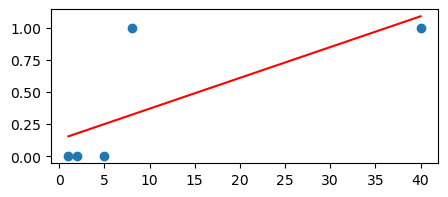

In [141]:
from scipy import stats
import matplotlib.pyplot as plt
plt.figure(figsize = (5, 2))
x = np.array([1, 2, 5, 8, 40])
y = np.array([0, 0, 0, 1, 1]) # 실제값
lm = stats.linregress(x, y)
list(lm)
H = lm[0]*x + lm[1] # 예측값
plt.scatter(x, y)
plt.plot(x, H, 'r')
plt.show()

![sigmoid](https://mlnotebook.github.io/img/transferFunctions/sigmoid.png)

In [150]:
# 교안 p50
x_data = np.array([[10, 0],
                   [8, 1],
                   [3, 3],
                   [2, 3],
                   [5, 1],
                   [2, 0],
                   [1, 0]])
y_data = np.array([[1],
                   [1],
                   [1],
                   [1],
                   [0],
                   [0],
                   [0]])
# X, y
X = tf.placeholder(shape = [None, 2],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)
# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_data,
                                                       y:y_data})
    if step % 1000 == 1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:4.153297424316406
1001번째 cost:0.19090811908245087
2001번째 cost:0.1490849107503891
3001번째 cost:0.12370074540376663
4001번째 cost:0.10554548352956772
5001번째 cost:0.09179357439279556
6001번째 cost:0.08103112131357193
7001번째 cost:0.07240509986877441
8001번째 cost:0.06535682082176208
9001번째 cost:0.05950324982404709
최종 cost:0.054577890783548355


In [160]:
# accuracy
# sess.run(H > .5, feed_dict = {X:x_data})
# cast() 형변환
predict = tf.cast(H >= .5, 
                  dtype = tf.float32)
# sess.run(predict, feed_dict = {X:x_data})
correct = tf.equal(predict, y)
sess.run(correct, feed_dict = {X : x_data,
                               y : y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print('모델의 정확도:', sess.run(accuracy, feed_dict = {X : x_data,
                                                       y : y_data})*100, '%')

모델의 정확도: 100.0 %


In [161]:
# 모델 사용하기 == 예측하기
input_data = np.array([[10, 3]])
sess.run(predict, feed_dict = {X:input_data})

array([[1.]], dtype=float32)

# 4. 분류분석
- 종속변수가 2개 이상
- 교안 p54

In [192]:
x_data = np.array([[10 ,7, 8, 5],
                   [8, 8, 9, 4],
                   [7, 8, 2, 3],
                   [6, 3, 9, 3],
                   [7, 5, 7, 4],
                   [3, 5, 6, 2],
                   [2, 4, 3, 1]])
y_data = np.array([["A"],
                   ["A"],
                   ["B"],
                   ["B"],
                   ["B"],
                   ["C"],
                   ["C"]])
# 종속변수가 다중분류면 One-Hot Encoding (교안 p58)
# sol 1
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
# to_categorical(y_data) # Error

encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = to_categorical(labeled_y_data)
print('sol 1:\n', onehot_y_data)

# sol 2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
encoder = LabelEncoder()
labeled_y_data = encoder.fit_transform(y_data.ravel())
onehot_y_data = pd.get_dummies(labeled_y_data).values # pd.get_dummies의 결과 데이터프레임
print('sol 2:\n', onehot_y_data)

# sol 3
# pd.get_dummies(pd.DataFrame(y_data))
onehot_y_data = pd.get_dummies(y_data.ravel()).values
print('sol 3:\n', onehot_y_data)
x_data.shape, onehot_y_data.shape

sol 1:
 [[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
sol 2:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]
sol 3:
 [[1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]]


((7, 4), (7, 3))

In [193]:
x_data # 독립변수

array([[10,  7,  8,  5],
       [ 8,  8,  9,  4],
       [ 7,  8,  2,  3],
       [ 6,  3,  9,  3],
       [ 7,  5,  7,  4],
       [ 3,  5,  6,  2],
       [ 2,  4,  3,  1]])

In [194]:
onehot_y_data # 종속변수

array([[1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 0, 1]], dtype=uint8)

In [202]:
# X, y
X = tf.placeholder(shape = [None, 4],
                   dtype = tf.float32)
Y = tf.placeholder(shape = [None, 3],
                   dtype = tf.float32)
# 독립변수가 4개, 종속변수가 3개인 weight & bias
W = tf.Variable(tf.random_normal([4, 3]))
b = tf.Variable(tf.random_normal([3]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.nn.softmax(logits) # softmax: 종속변수들의 합이 1
# H      = tf.sigmoid(logits) # binary classification(이진분류)일 경우

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logits,
                                                                 labels = Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_data,
                                                       Y:onehot_y_data})
    if step % 1000 == 1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:4.583333492279053
1001번째 cost:1.2144931554794312
2001번째 cost:0.051496472209692
3001번째 cost:0.03915766254067421
4001번째 cost:0.03289083018898964
5001번째 cost:0.028557905927300453
6001번째 cost:0.025279883295297623
7001번째 cost:0.022688711062073708
8001번째 cost:0.020581791177392006
9001번째 cost:0.018832718953490257
최종 cost:0.01735799014568329


In [198]:
# 예측하기
input_data = np.array([[10, 7, 8, 5]])
y_hat = sess.run(H, feed_dict = {X:input_data})
print(y_hat)
print(y_hat.argmax(axis = 1)) # argmax(axis = 1): 행별 최댓값이 있는 index

[[9.6799588e-01 3.2004073e-02 2.8224881e-12]]
[0]


In [212]:
# accuracy 측정
# H(예측값): 0.99, 0.005, 0.005 -> H.argmax -> 0
# y(실제값):   1      0      0  -> Y.argmax -> 0
predict = tf.argmax(H, axis = 1)
# sess.run(predict, feed_dict = {X:x_data})
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
# sess.run(correct, feed_dict = {X:x_data,
#                                Y:onehot_y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print(sess.run(accuracy, feed_dict = {X:x_data,
                                      Y:onehot_y_data})*100, '%')

100.0 %


# 5. XOR(교안 p77)

In [216]:
# dataset
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])

In [223]:
# X, y
X = tf.placeholder(shape = [None, 2],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)
# 독립변수가 2개, 종속변수가 1개인 weight & bias
W = tf.Variable(tf.random_normal([2, 1]))
b = tf.Variable(tf.random_normal([1]))
# Hypothesis
logits = tf.matmul(X, W) + b
H      = tf.sigmoid(logits)
# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = .01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_data,
                                                       y:y_data})
    if step % 1000 == 1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:0.739063024520874
1001번째 cost:0.6977313756942749
2001번째 cost:0.6952003240585327
3001번째 cost:0.6940739154815674
4001번째 cost:0.6935669183731079
5001번째 cost:0.6933377981185913
6001번째 cost:0.6932339072227478
7001번째 cost:0.6931866407394409
8001번째 cost:0.6931651830673218
9001번째 cost:0.6931554079055786
최종 cost:0.6931509375572205


In [227]:
# accuracy 측정
predict = tf.cast(H >= .5, dtype = tf.float32)
sess.run(predict, feed_dict = {X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict = {X:x_data, 
#                                y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
sess.run(accuracy, feed_dict = {X:x_data,
                                y:y_data})

0.75

# 6. Deep Learning XOR 예제

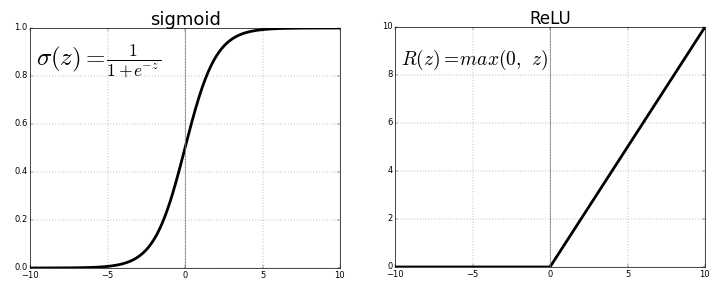)

In [231]:
# dataset
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])
# X, y
X = tf.placeholder(shape = [None, 2],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력4)
W1 = tf.Variable(tf.random_normal([2, 4]),
                 name = 'weight1')
b1 = tf.Variable(tf.random_normal([4]),
                 name = 'bias1')
# logits = tf.matmul(X, W1) + b1
# H1 = tf.sigmoid(logits)
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2의 weight & bias (layer2 = 입력4, 출력1): 마지막 출력층
W2 = tf.Variable(tf.random_normal([4, 1]),
                 name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]),
                 name = 'bias2')
# hypothesis
logits = tf.matmul(layer1, W2) + b2
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = .01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_data,
                                                       y:y_data})
    if step % 1000 == 1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:1.017961025238037
1001번째 cost:0.20663803815841675
2001번째 cost:0.10935445874929428
3001번째 cost:0.07246419787406921
4001번째 cost:0.05353953689336777
5001번째 cost:0.04206955432891846
6001번째 cost:0.03443976491689682
7001번째 cost:0.02901759371161461
8001번째 cost:0.02498917654156685
9001번째 cost:0.02188677154481411
최종 cost:0.019435055553913116


In [233]:
# accuracy 측정
predict = tf.cast(H >= .5, dtype = tf.float32)
sess.run(predict, feed_dict = {X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict = {X:x_data, 
#                                y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
sess.run(accuracy, feed_dict = {X:x_data,
                                y:y_data})

1.0

## layer층을 X2 -> 10 -> 20 -> 10 -> y1
              입력층      hidden layer      출력층

In [235]:
# dataset
x_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],
                   [1],
                   [1],
                   [0]])
# X, y
X = tf.placeholder(shape = [None, 2],
                   dtype = tf.float32)
y = tf.placeholder(shape = [None, 1],
                   dtype = tf.float32)

# layer1의 weight & bias (layer1 = 입력2, 출력10)
W1 = tf.Variable(tf.random_normal([2, 10]),
                 name = 'weight1')
b1 = tf.Variable(tf.random_normal([10]),
                 name = 'bias1')
layer1 = tf.nn.relu(tf.matmul(X, W1) + b1)

# layer2의 weight & bias (layer2 = 입력10, 출력20)
W2 = tf.Variable(tf.random_normal([10, 20]),
                 name = 'weight2')
b2 = tf.Variable(tf.random_normal([20]),
                 name = 'bias2')
layer2 = tf.nn.relu(tf.matmul(layer1, W2) + b2)

# layer3의 weight & bias (layer3 = 입력20, 출력10)
W3 = tf.Variable(tf.random_normal([20, 10]),
                 name = 'weight3')
b3 = tf.Variable(tf.random_normal([10]),
                 name = 'bias3')
layer3 = tf.nn.relu(tf.matmul(layer2, W3) + b3)

# layer4의 weight & bias (마지막 출력층 = 입력10, 출력1): 
W4 = tf.Variable(tf.random_normal([10, 1]))
b4 = tf.Variable(tf.random_normal([1]))

# hypothesis
logits = tf.matmul(layer3, W4) + b4
H = tf.sigmoid(logits)

# cost 함수
# cost = tf.reduce_mean(tf.square(H - y))
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits = logits,
                                                              labels = y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate = .01).minimize(cost)
# sess & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())
# 학습
for step in range(1, 10001):
    _, cost_val = sess.run([train, cost], feed_dict = {X:x_data,
                                                       y:y_data})
    if step % 1000 == 1:
        print('{}번째 cost:{}'.format(step, cost_val))
print('최종 cost:{}'.format(cost_val))

1번째 cost:1.9564439058303833
1001번째 cost:0.0022885329090058804
2001번째 cost:0.0010960799409076571
3001번째 cost:0.0006980833131819963
4001번째 cost:0.0005047866725362837
5001번째 cost:0.0003878595307469368
6001번째 cost:0.0003010293876286596
7001번째 cost:0.00024340210075024515
8001번째 cost:0.00020415364997461438
9001번째 cost:0.00017904416017699987
최종 cost:0.00015927833737805486


In [239]:
# accuracy 측정
predict = tf.cast(H >= .5, dtype = tf.float32)
sess.run(predict, feed_dict = {X:x_data})
correct = tf.equal(predict, y)
# sess.run(correct, feed_dict = {X:x_data, 
#                                y:y_data})
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print(sess.run(accuracy, feed_dict = {X:x_data,
                                      y:y_data})*100, '%')

100.0 %
